#Part I: Data Collection

Q1. Collect all the Reddit comments for the subreddit [r/Fosterparents](https://www.reddit.com/r/Fosterparents/) throughout the year 2020 (from January 1st to December 31st, 2020).

Use the PSAW API to collect these data.

Fit all comments into a dataframe called df. 

[5 points]

In [1]:
#A1.
!pip install psaw

In [9]:
import pandas as pd
import datetime as dt
import re
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from gensim import corpora
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
import string
from psaw import PushshiftAPI
api = PushshiftAPI()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    return next_month - datetime.timedelta(days=next_month.day)

In [5]:
import datetime
subredditlist = ['Ex_Foster']
for reddit in subredditlist:
   #collect data 2020
    for y in range(2020,2021):
      #collect data between January and December
      for i in range(1,13):
          file_name= str(reddit)+"_"+str(y)+"_"+str(i)+".json"
          print("starting with the month "+str(i))
          print("for subreddit..."+str(reddit))
          print("setting start epoch...")
          start_epoch=int(dt.datetime(y, i, 1).timestamp())
          print("setting end epoch...")
          last_day = last_day_of_month(datetime.date(y, i, 1))
          print("the last day of the month is...")
          print(last_day.day)
          last_day = int(last_day.day)
          end_epoch = int(dt.datetime(y,i,last_day).timestamp())
          print("setting up the generator...")
          gen = api.search_comments(after=start_epoch, before=end_epoch,subreddit=reddit)
          print("setting up the dataframe...")
          df = pd.DataFrame([obj.d_ for obj in gen])
          print("The number of comments for year "+ str(y)+" and month "+str(i)+" is "+str(len(df.index)))
          df.to_json(file_name)

starting with the month 1
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2020 and month 1 is 134
starting with the month 2
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
29
setting up the generator...
setting up the dataframe...
The number of comments for year 2020 and month 2 is 210
starting with the month 3
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2020 and month 3 is 275
starting with the month 4
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2020 and month 4 is 279
starting with the month 5
fo

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


The number of comments for year 2020 and month 7 is 353
starting with the month 8
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2020 and month 8 is 217
starting with the month 9
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2020 and month 9 is 217
starting with the month 10
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2020 and month 10 is 222
starting with the month 11
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments fo

In [15]:
df.tail()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,created
131,[],None,IDidntShart,None,None,[],None,None,None,text,t2_s7fbz,False,False,[],"Listen, I can’t answer this for you. I have no...",None,None,1606788905,{},ge7u9gm,False,t3_k4b2ja,False,True,t3_k4b2ja,/r/Ex_Foster/comments/k4b2ja/aged_out_foster_k...,1606795338,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606789e+09
132,[],None,unspokenthoughtsxx89,None,None,[],None,None,None,text,t2_5b5wt8s8,False,False,[],Kk,None,None,1606787726,{},ge7s1sr,False,t3_k0jgks,False,True,t3_k0jgks,/r/Ex_Foster/comments/k0jgks/just_an_fyi_ill_b...,1606794155,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606788e+09
133,[],None,teacheroftroubles,None,None,[],None,None,None,text,t2_16xxn8,False,False,[],I am a ffy and a teacher - keep my contact I w...,None,None,1606786577,{},ge7pxm2,False,t3_j25l2c,False,True,t3_j25l2c,/r/Ex_Foster/comments/j25l2c/looking_for_volun...,1606793009,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606787e+09
134,[],None,teacheroftroubles,None,None,[],None,None,None,text,t2_16xxn8,False,False,[],"As kid who was respited it sucked strangers, s...",None,None,1606786484,{},ge7pr9k,False,t3_j6i603,False,False,t3_j6i603,/r/Ex_Foster/comments/j6i603/respite/ge7pr9k/,1606792915,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606786e+09
135,[],None,teacheroftroubles,None,None,[],None,None,None,text,t2_16xxn8,False,False,[],I want to say I got a package today - with a n...,None,None,1606786049,{},ge7oy0j,False,t3_k0jgks,False,True,t3_k0jgks,/r/Ex_Foster/comments/k0jgks/just_an_fyi_ill_b...,1606792478,1,True,False,Ex_Foster,t5_ykjzi,None,0,[],1.606786e+09


#Part II: TF-IDF

Q2. Create a TFIDF vectorizer using ngrams between 1 and 3, and remove all english stop words using NLTK. [10 points]

In [12]:
#A2.
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

stoplist = stopwords.words('english')
vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words=stoplist)

Q3. Fit the vectorizer on the body column of the dataframe. [5 points]

In [13]:
#A3.
X = vectorizer.fit_transform(df['body'])

Q4. Find the top features (without the weights) using the TF-IDF vector using ngrams betwen 1 and 3. In other words, show the top 20 tokens for 1-gram, 2-gram, and 3-grams [15 points]

In [14]:
#A4.
features_by_gram = defaultdict(list)
for f, w in zip(vectorizer.get_feature_names(), vectorizer.idf_):
    features_by_gram[len(f.split(' '))].append((f, w))

top_n = 20

for gram, features in features_by_gram.items():
    #get sorted top features
    top_features = sorted(features, key=lambda x: x[1], reverse=False)[:top_n]
    #get the top features and their weights
    #now just focus on getting the first element of the tuple
    top_features = [f[0] for f in top_features]
    print('{}-gram top:'.format(gram), top_features)

1-gram top: ['like', 'foster', 'get', 'one', 'think', 'would', 'know', 'time', 'want', 'also', 'good', 'people', 'feel', 'go', 'kids', 'much', 'take', 'thank', 'care', 'things']
2-gram top: ['feel like', 'foster care', 'foster parent', 'group home', 'feel free', 'thank sharing', 'make sure', 'even though', 'felt like', 'foster kid', 'foster parents', 'good luck', 'group homes', 'https www', 'sex education', 'years ago', '15 minute', 'ex fosters', 'feels like', 'former foster']
3-gram top: ['cares enough make', 'feel free message', 'former foster youth', 'foster care agency', 'free career coaching', 'gifts specific enough', 'give much space', 'give personal info', 'hope gets better', 'hoping gifts specific', 'social workers foster', 'someone cares enough', 'take grain salt', '10 15 girls', '10 years time', '100 pro choice', '100 time thank', '11 aunt uncle', '11 freaking months', '12 foster home']


#Part III: LDA

Q5.Now create the dataframe we will use for the LDA model. Each document should be the complete Reddit thread. The thread is grouped by the field link_id. Call this dataframe **df_p_threads** [5 points]

In [26]:
#A5
df_p = df.reset_index().groupby("link_id",as_index=False )['body'].apply(lambda x: ','.join(x))
p_threads = df_p.values
df_p_threads = pd.DataFrame(p_threads)
df_p_threads.rename(columns={0: "comment_thread", 1: "body"},inplace=True)
df_p_threads

,comment_thread,body
0,t3_j25l2c,"Thank you!,I am a ffy and a teacher - keep my ..."
1,t3_j6i603,I loved both respite people I stayed with it w...
2,t3_j8ay2m,I was only in foster care from age 16-17 only ...
3,t3_k0jgks,I'm really happy to hear that things were ship...
4,t3_k3ih6a,"Oh no, I'm so sorry for your loss. I am going ..."
5,t3_k3kwte,"Honestly, I don't know. I'm not accustomed to ..."
6,t3_k4b2ja,You are right these are systemic barriers that...
7,t3_k50ay8,I was in a group home when I was first put int...
8,t3_k5bx2l,I'm proud of you!! Thats a great accomplishmen...
9,t3_k5o2t4,"As a teen I read adult books, murder and horro..."


Q6. In the first pass, clean the text by removing the newline character code, the aperasand character code, non-breaking space and, and zero-width space. [5 points]

In [35]:
#A6
def first_pass(text): 
    text = str(text)
    text = text.replace('\\n',' ')
    text = text.replace('&amp',' ')
    text = text.replace(';#x200B;',' ')
    text = text.replace('nbsp',' ')
    return text
df_p_threads['clean_text'] = df_p_threads.body.apply(first_pass)

Q7.In the second pass, tokenize, remove stopwords and punctuation as well as urls (web links). I also want you to use the nltk lemmatizer to lemmatize the body [5 points]

In [36]:
#A7
nltk.download('punkt')
nltk.download('wordnet')
stopwords_english = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def second_pass(text): 
    text = str(text)
    text = text.lower()
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    tokens = nltk.word_tokenize(text) 
    clean_text = []
    for word in tokens:
        if (word not in stopwords_english and word not in string.punctuation): 
            token = wordnet_lemmatizer.lemmatize(word)
            clean_text.append(token)       
    clean_text = [token for token in clean_text if len(token) > 3]  
    return clean_text     
df_p_threads['clean_text'] = df_p_threads.body.apply(second_pass)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
df_p_threads.clean_text

0     [thank, teacher, keep, contact, would, love, s...
1     [loved, respite, people, stayed, awesome, fost...
2     [foster, care, 16-17, feel, always, feel, weir...
3     [really, happy, hear, thing, shipped, quickly,...
4     [sorry, loss, going, thing, lost, pupper, resc...
5     [honestly, know, accustomed, family, dynamic, ...
6     [right, systemic, barrier, aged, face, rest, l...
7     [group, home, first, care, home, taking, city,...
8     [proud, thats, great, accomplishment, foster, ...
9     [teen, read, adult, book, murder, horror, alex...
10               [someone, posted, back, still, active]
11    [husband, biological, child, talked, fostering...
12    [heard, organization, called, home, within, co...
13    [deleted, think, often, people, agreed, help, ...
14    [person, location, noted, 15-minute, interval,...
15    [totally, agree., lineage, foster, came, cultu...
16    [sorry, went, life, foster, home, freaking, mo...
17    [former, foster, youth, trying, good, cust

In [38]:
#Now that we have the cleaned text for each thread
#documents, or docs represents each thread
docs = df_p_threads.clean_text

Q8.Create a gensim dictionary using the docs [5 points]


In [42]:
#A8
dictionary = corpora.Dictionary(docs)
print(len(dictionary))
dictionary.save('Ex_Foster.dict')
print(dictionary)

1813
Dictionary(1813 unique tokens: ['contact', 'keep', 'love', 'math', 'someone']...)


Q9.Create the gensim corpus using the dictionary [5 points]

In [43]:
#A9
corpus = [dictionary.doc2bow(text) for text in docs]
corpora.MmCorpus.serialize('Ex_Foster.mm', corpus)
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1)]]


Q10.Create the id2word mapping between the token number and the words. Call this **id2word** [5 points]

In [44]:
#A10
id2word = corpora.Dictionary(docs)
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('contact', 1), ('keep', 1), ('love', 1), ('math', 1), ('someone', 1), ('teacher', 2), ('thank', 1), ('would', 1)]]


Q11.As we did in the class example, I want you to run LDA models over the documents. Start with 10 topics, and with steps of 10 topics, the limit would be 110 topics. You should have a total of 9 models. [20 points]

In [48]:
#A11
from sklearn.externals import joblib
import os

def compute_coherence_values(dictionary, corpus, texts, limit=110, start=10, step=10):
    chunksize = 1000
    passes = 20
    workers = 6
    
    coherence_values = []
    model_list = []
    #setup the LDA model 
    #it is multicore so we can run multiple models together
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=num_topics, 
                                   random_state=100,
                                   chunksize=chunksize,
                                   passes=passes,
                                   per_word_topics=True,
                                   workers=workers)
        print('saving the LDA model...')
        Filename = "LDA_Model_"+str(num_topics)+".model"
        model.save(Filename)
        model_list.append(model)
        print('done with model ',str(num_topics))
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        print('coherence metric is ',str(coherencemodel.get_coherence()))
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

limit = 110
start = 10
step  = 10

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=start, limit=limit, step=step)

saving the LDA model...
done with model  10
coherence metric is  0.2829795435972672
saving the LDA model...
done with model  20
coherence metric is  0.324101266792016
saving the LDA model...
done with model  30
coherence metric is  0.32699096865830357
saving the LDA model...
done with model  40
coherence metric is  0.307173577770281
saving the LDA model...
done with model  50
coherence metric is  0.3197837645922683
saving the LDA model...
done with model  60
coherence metric is  0.315366247343972
saving the LDA model...
done with model  70
coherence metric is  0.32216030304973375
saving the LDA model...
done with model  80
coherence metric is  0.33692967204096325
saving the LDA model...
done with model  90
coherence metric is  0.33015753405587905


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


saving the LDA model...
done with model  100
coherence metric is  0.35235499529866277


Q12.Graph the coherence scores for all nine models and select the optimum topic model. [10 points]

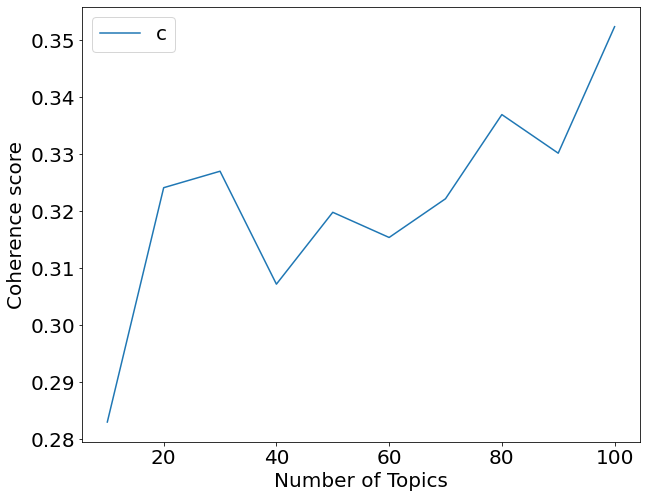

In [57]:
#A12
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(10,8)})

fig = plt.gcf()

limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
fig.savefig('LDA_models_coherence.jpg')

import pprint
# Select the model and print the topics
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=True)

In [55]:
optimal_model.num_topics

100

Q13.Print all the topics in the optimum LDA model [5 points]

In [56]:
#A13
topics= optimal_model.print_topics(num_words=20)
topics

[(6,
  '0.001*"know" + 0.001*"shelter" + 0.001*"feeling" + 0.001*"like" + 0.001*"time" + 0.001*"family" + 0.001*"want" + 0.001*"people" + 0.001*"many" + 0.001*"usually" + 0.001*"nice" + 0.001*"mean" + 0.001*"year" + 0.001*"would" + 0.001*"first" + 0.001*"something" + 0.001*"think" + 0.001*"home" + 0.001*"also" + 0.001*"need"'),
 (4,
  '0.021*"know" + 0.019*"abortion" + 0.017*"pregnant" + 0.016*"would" + 0.014*"foster" + 0.012*"state" + 0.012*"worker" + 0.012*"care" + 0.011*"social" + 0.011*"girl" + 0.011*"also" + 0.011*"right" + 0.009*"agency" + 0.009*"option" + 0.009*"child" + 0.009*"education" + 0.008*"good" + 0.008*"even" + 0.008*"knew" + 0.008*"pregnancy"'),
 (79,
  '0.001*"help" + 0.001*"want" + 0.001*"thing" + 0.001*"advice" + 0.001*"career" + 0.001*"right" + 0.001*"work" + 0.001*"know" + 0.001*"also" + 0.001*"life" + 0.001*"like" + 0.001*"give" + 0.001*"school" + 0.001*"year" + 0.001*"experience" + 0.001*"education" + 0.001*"would" + 0.001*"people" + 0.001*"others" + 0.001*"goin

Q14. [EXTRA points] Sort the models based on coherence scores and print them in order [10 points]

In [51]:
#A14
for m, cv in sorted_coherence:
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 100  has Coherence Value of 0.3524
Num Topics = 80  has Coherence Value of 0.3369
Num Topics = 90  has Coherence Value of 0.3302
Num Topics = 30  has Coherence Value of 0.327
Num Topics = 20  has Coherence Value of 0.3241
Num Topics = 70  has Coherence Value of 0.3222
Num Topics = 50  has Coherence Value of 0.3198
Num Topics = 60  has Coherence Value of 0.3154
Num Topics = 40  has Coherence Value of 0.3072
Num Topics = 10  has Coherence Value of 0.283
